<div style="padding:20px;color:#DEB078;margin:0;font-size:300%;text-align:center;display:fill;border-radius:5px;background-color:#800000;overflow:hidden;font-weight:800">🚀 Spaceship Titanic 🚀</div>



* Welcome to the year 2912, where your data science skills are needed to solve a cosmic mystery. 
* We've received a transmission from four lightyears away and things aren't looking good.
* The Spaceship Titanic was an interstellar passenger liner launched a month ago. 
* With almost 13,000 passengers on board, the vessel set out on its maiden voyage transporting emigrants from our solar system to three newly habitable exoplanets orbiting nearby stars.

* While rounding Alpha Centauri en route to its first destination—the torrid 55 Cancri E—the unwary Spaceship Titanic collided with a spacetime anomaly hidden within a dust cloud. 
* Sadly, it met a similar fate as its namesake from 1000 years before. Though the ship stayed intact, almost half of the passengers were transported to an alternate dimension!



## <b><div style='padding:15px;background-color:#800000;color:#DEB078;border-radius:2px;font-size:110%;text-align: center'>0 | Introduction and Content Overview</div></b>

* This notebook Covers Eda , Feature Engineering , Automated Models using Lazypredict and Manual Models (Inprogress)

* Content 
    * Environment and Dataset Setup
    * Inspecting Dataframe
    * Univariate Analysis
    * Multivariate Analysis
    * Feature Engineering
    * Automated Model Using Lazypredict (Rows containing null dropped)
    * Automated Model Using Lazypredict (Nulls Imputed)
    * Automated Model Using Lazypredict (Nulls as it is)
    * Manual Linear Models Without Parameter Tuning
    * Manual Linear Models With Parameter Tuning
    * Manual Tree Models With Parameter Tuning
    * Manual Tree Models Without Parameter Tuning 
    * Model Performance So Far

## <b><div style='padding:15px;background-color:#800000;color:#DEB078;border-radius:2px;font-size:110%;text-align: center'>1 | Environment and Dataset Setup</div></b>

### <b><span style='color:#DEB078'>1.1 |</span><span style='color:#660000'> Install Lazypredict</span></b>  

In [1]:
from IPython.display import clear_output
!pip3 install -U lazypredict
clear_output()

### <b><span style='color:#DEB078'>1.2 |</span><span style='color:#660000'> Import Libraries</span></b>  

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
import math
import plotly
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import  train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import  LogisticRegression , RidgeClassifier , SGDClassifier 
from sklearn.svm import LinearSVC,SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,BaggingClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier,ExtraTreeClassifier
from sklearn.model_selection import StratifiedKFold,cross_val_score,GridSearchCV,RandomizedSearchCV
from sklearn import metrics
from lazypredict.Supervised import LazyClassifier

### <b><span style='color:#DEB078'>1.3 |</span><span style='color:#660000'> Configure Properties</span></b>  

In [3]:
%matplotlib inline
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns',100)          # Set now of columns visible to 100
pd.set_option('display.max_rows',100)          # Set now of rows visible to 100
plotly.offline.init_notebook_mode(connected=True)
temp=dict(layout=go.Layout(font=dict(family="Franklin Gothic", size=12), height=500, width=1000))

### <b><span style='color:#DEB078'>1.4 |</span><span style='color:#660000'> Import Data</span></b>  

In [4]:
df_raw=pd.read_csv("/kaggle/input/spaceship-titanic/train.csv")
train=df_raw.copy()
submission=pd.read_csv("/kaggle/input/spaceship-titanic/sample_submission.csv")
test_raw=pd.read_csv("/kaggle/input/spaceship-titanic/test.csv")


## <b><div style='padding:15px;background-color:#800000;color:#DEB078;border-radius:2px;font-size:110%;text-align: center'>2 | Inspecting Dataframe</div></b>

### <b><span style='color:#DEB078'>2.1 |</span><span style='color:#660000'> Features Descriptions</span></b>  

* <b>PassengerId</b> - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.
* <b>HomePlanet</b> - The planet the passenger departed from, typically their planet of permanent residence.
* <b>CryoSleep</b> - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.
* <b>Cabin</b> - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.
* <b>Destination</b> - The planet the passenger will be debarking to.
* <b>Age</b> - The age of the passenger.
* <b>VIP</b> - Whether the passenger has paid for special VIP service during the voyage.
* <b>RoomService, FoodCourt, ShoppingMall, Spa, VRDeck</b> - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.
* <b>Name</b> - The first and last names of the passenger.
* <b>Transported</b> - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.

### <b><span style='color:#DEB078'>2.2 |</span><span style='color:#660000'> Shape and Column Dtype</span></b>  

In [5]:
train.shape

(8693, 14)

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


### <b><span style='color:#DEB078'>2.3 |</span><span style='color:#660000'> Data Changes based on column description</span></b>  

In [7]:
# Splitting Passenger id and Cabin  to better understand relation of individual values present in them

train=train.assign(
          PassengerId_GroupId=train['PassengerId'].str[:4].astype(np.int16)
         ,PassengerId_PassengerNumber=train['PassengerId'].str[5:].astype(np.int16)
         )

train.drop(columns='PassengerId',inplace=True)

train=train.assign( 
           Cabin_Deck=train["Cabin"].str.split("/").str[0],
          Cabin_Num=train["Cabin"].str.split("/").str[1],
           Cabin_Side=train["Cabin"].str.split("/").str[2]
         )

train.drop(columns='Cabin',inplace=True)

### <b><span style='color:#DEB078'>2.4 |</span><span style='color:#660000'> Null Check</span></b>  

In [8]:
train.shape

(8693, 17)

In [9]:
temp_data= train.isna().mean().sort_values()
fig=px.imshow(train.isna().astype(np.int8),color_continuous_scale=['#660000','#DEB078'],title='HeatMap for Null Values (0 -> Not Null & 1 -> Null)')
fig.update_layout(height=400)
fig.show()
fig=px.bar(x=temp_data.index, y=temp_data.values ,color_discrete_sequence=['#DEB078'],title='Null Value ratio column wise',labels={'x':'Column Name','y':'Ratio'})
fig.update_layout(height=400)
fig.show()

### <b><span style='color:#DEB078'>2.5 |</span><span style='color:#660000'> Unique Vallue Check</span></b>  

In [10]:
fig = make_subplots(rows=1, cols=2,
                    subplot_titles=("Unique values per Categorical feature", "Unique values per Numerical feature"))


temp_data=train.select_dtypes(exclude="number").nunique().sort_values()

fig.add_trace(
    go.Bar(x=temp_data.index, y=temp_data.values,marker=dict(color='#660000')),
    row=1, col=1
)



temp_data=train.select_dtypes(include="number").nunique().sort_values()

fig.add_trace(
    go.Bar(x=temp_data.index, y=temp_data.values,marker=dict(color='#DEB078')),
    row=1, col=2
)

fig.update_layout(height=400)
fig.show()

### <b><span style='color:#DEB078'>2.6 |</span><span style='color:#660000'> Value Behaviour Across Rows</span></b>  

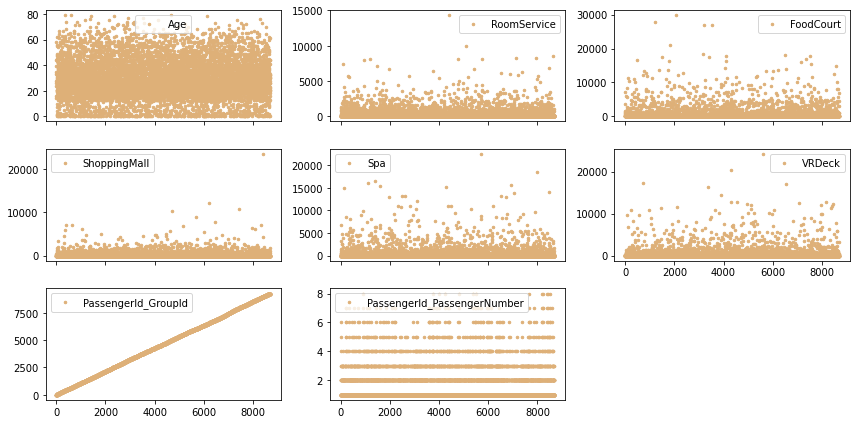

In [11]:
# For all Numerical columnn for all rows 
train.plot(lw=0, marker=".", subplots=True, layout=(-1, 3),
          figsize=(12,6), markersize=5,color='#DEB078')
plt.tight_layout()

### <b><span style='color:#DEB078'>2.7 |</span><span style='color:#660000'> Data Changes based on unique value</span></b>  

In [12]:
train.drop(columns='Name',inplace=True)

## <b><div style='padding:15px;background-color:#800000;color:#DEB078;border-radius:2px;font-size:110%;text-align: center'>3 | Univariate Analysis</div></b>

### <b><span style='color:#DEB078'>3.1 |</span><span style='color:#660000'> Target Variable</span></b>  

In [13]:

target=train[['Transported']].value_counts(normalize=True).round(decimals=3)*100

pal, color=['#DEB078','#660000'], ['#DEB078','#660000']
fig=go.Figure()

fig.add_trace(go.Pie(labels=target.index, values=target, hole=.5, 
                     showlegend=True,sort=False, 
                     marker=dict(colors=color,line=dict(color=pal,width=2.5)),
                     hovertemplate = "%{label} Transported: %{value:.2f}%<extra></extra>"))

fig.update_layout(template=temp, title='Target Distribution', 
                  legend=dict(traceorder='reversed',y=1.05,x=0),
                  uniformtext_minsize=15, uniformtext_mode='hide',height=500)
fig.show()

***
*  50.4 % of training set got transported
*  49.6 % of training set did not got transported
***

### <b><span style='color:#DEB078'>3.2 |</span><span style='color:#660000'> Categorical Columns</span></b>  

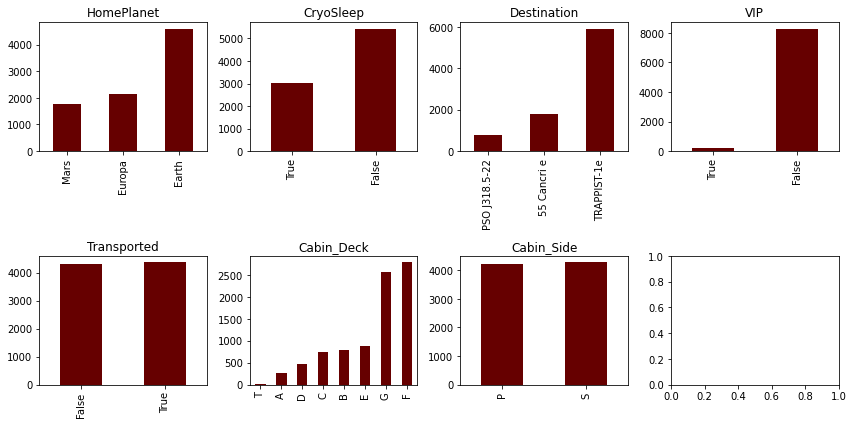

In [14]:
cat_threshold=10
fields=train.select_dtypes(exclude="number").nunique()[train.select_dtypes(exclude="number").nunique() <=cat_threshold].index.tolist()

figuresize=(12,6)
cols=4
rows=math.ceil(len(fields)/cols)
#print()

plt.subplots(rows,cols,figsize=figuresize)
for i in range(1,len(fields)+1) :
    plt.subplot(rows,cols,i)
    train[fields[i-1]].value_counts().sort_values().plot.bar(color='#660000')  
    plt.xticks(rotation=90)
    plt.title(fields[i-1])
    
plt.tight_layout()
plt.show()

### <b><span style='color:#DEB078'>3.3 |</span><span style='color:#660000'> Numerical Columns</span></b>  

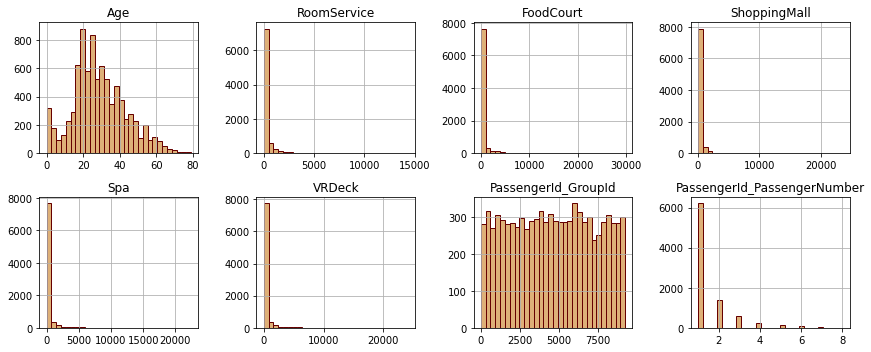

In [15]:
# Plots the histogram for each numerical feature in a separate subplot
figsize_val=(12,5)
layout_val=(-1, 4)
train.hist(bins=30, figsize=figsize_val, layout=layout_val,color='#DEB078', edgecolor="#660000")
plt.tight_layout();

### <b><span style='color:#DEB078'>3.4 |</span><span style='color:#660000'> Outlier Check for Numerical Columns using IQR</span></b>  

In [16]:
kk=(train.select_dtypes(include='number').columns).to_list()

df=train[kk]


upper =df.quantile(0.75)+1.5 *(df.quantile(0.75)-df.quantile(0.25))
lower = df.quantile(0.25)-1.5 *(df.quantile(0.75)-df.quantile(0.25))

for i in train.select_dtypes(include='number'):
    print('\nColumn -> ',i,'')   
    x= df[ (df[i]<round(lower[i],2)) |  (df[i]>round(upper[i],2))][i].to_list()
    print('No of Outliers presesnt -> ',len(x))
    print('\n','*'*10)


Column ->  Age 
No of Outliers presesnt ->  77

 **********

Column ->  RoomService 
No of Outliers presesnt ->  1861

 **********

Column ->  FoodCourt 
No of Outliers presesnt ->  1823

 **********

Column ->  ShoppingMall 
No of Outliers presesnt ->  1829

 **********

Column ->  Spa 
No of Outliers presesnt ->  1788

 **********

Column ->  VRDeck 
No of Outliers presesnt ->  1809

 **********

Column ->  PassengerId_GroupId 
No of Outliers presesnt ->  0

 **********

Column ->  PassengerId_PassengerNumber 
No of Outliers presesnt ->  493

 **********


## <b><div style='padding:15px;background-color:#800000;color:#DEB078;border-radius:2px;font-size:110%;text-align: center'>4 | Multivariate Analysis</div></b>

### <b><span style='color:#DEB078'>4.1 |</span><span style='color:#660000'> Helping Function</span></b>  

In [17]:
# Helping Function
def stats(x):
    temp1=(train[[x,'Transported']].value_counts(normalize=True).round(decimals=3)*100).reset_index().rename(columns={0:'Overall_Percent'})
    Coloumn_To_Aggregate=[x,'Transported']
    df6=pd.merge(train.groupby(Coloumn_To_Aggregate).size().reset_index(name='ind_siz'), 
                 train.groupby(Coloumn_To_Aggregate[:-1]).size().reset_index(name='Total'), on =Coloumn_To_Aggregate[:-1])
    df6['Category_Percent']=round((df6['ind_siz']/df6['Total'])*100 ,2)
    temp2=df6[[x,'Transported','Category_Percent']]
    temp3=temp1.merge(temp2,on=[x,'Transported'])
    return temp3.pivot(columns=x,index='Transported')

### <b><span style='color:#DEB078'>4.2 |</span><span style='color:#660000'> Target variable Relation with Categorical variables</span></b>  

In [18]:
train.select_dtypes(exclude='number').columns

Index(['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'Transported',
       'Cabin_Deck', 'Cabin_Num', 'Cabin_Side'],
      dtype='object')


<b><span style='color:#660000'> HomePlanet</span></b>

In [19]:
px.histogram(train, x='HomePlanet', color="Transported", barmode='group',color_discrete_sequence=['#660000','#DEB078'])

In [20]:
stats('HomePlanet')

Overall_Percent              Category_Percent             
HomePlanet            Earth Europa  Mars            Earth Europa  Mars
Transported                                                           
False                 31.20   8.60  9.90            57.61  34.12 47.70
True                  23.00  16.50 10.80            42.39  65.88 52.30

***
* 49.6 % (Not Transported) -> 31.2 %  were from Earth.
* 50.4 % (Transported)     -> 23 % were from Earth.
***
* 42.39 % of people from earth got transported
* 65.88 % of people from Europa got transported
* 52.3 % of people from Mars got transported
***

<b><span style='color:#660000'> CryoSleep</span></b>

In [21]:
px.histogram(train, x='CryoSleep', color="Transported", barmode='group',color_discrete_sequence=['#660000','#DEB078'])

In [22]:
stats('CryoSleep')

Overall_Percent       Category_Percent      
CryoSleep             False  True            False  True
Transported                                             
False                 43.10  6.50            67.11 18.24
True                  21.10 29.30            32.89 81.76

***
* 49.6 % (Not Transported) -> 43.1 %  were not in cryosleep and rest 6.1 % were in sleep.
* 50.4 % (Transported)     -> 29.3 % were in sleep and 21.1 % were not in sleep
***
* 81.6  % of people doing cryosleep got transported
* 18.24 % of people not doing cryosleep got transported
***

<b><span style='color:#660000'> Destination</span></b>

In [23]:
px.histogram(train, x='Destination', color="Transported", barmode='group',color_discrete_sequence=['#660000','#DEB078'])

In [24]:
stats('Destination')

Overall_Percent                           Category_Percent  \
Destination     55 Cancri e PSO J318.5-22 TRAPPIST-1e      55 Cancri e   
Transported                                                              
False                  8.20          4.60       36.80            39.00   
True                  12.90          4.70       32.70            61.00   

                                       
Destination PSO J318.5-22 TRAPPIST-1e  
Transported                            
False               49.62       52.88  
True                50.38       47.12

***
* 49.6 % (Not Transported) -> 36.8 %  were going to TRAPPIST-1e
* 50.4 % (Transported)     -> 32.7 %  were going to TRAPPIST-1e
***
* 61.0   % of people going to ''55 Cancri e'' got transported
* 50.38 % of people going to ''PSO J318.5-22'' got transported
* 47.12 % of people going to ''TRAPPIST-1e'' got transported
***

<b><span style='color:#660000'> VIP</span></b>

In [25]:
px.histogram(train, x='VIP', color="Transported", barmode='group',color_discrete_sequence=['#660000','#DEB078'])

In [26]:
stats('VIP')

Overall_Percent      Category_Percent      
VIP                   False True            False  True
Transported                                            
False                 48.20 1.40            49.37 61.81
True                  49.40 0.90            50.63 38.19

***
* 49.6 % (Not Transported) -> 48.2 %  were not vip
* 50.4 % (Transported)     -> 49.4 %  were not vip
***
* 50.63 % of non vip people got transported
* 38.19 % of vip people got transported
***

<b><span style='color:#660000'> Cabin_Side</span></b>

In [27]:
px.histogram(train, x='Cabin_Side', color="Transported", barmode='group',color_discrete_sequence=['#660000','#DEB078'])

In [28]:
stats('Cabin_Side')

Overall_Percent       Category_Percent      
Cabin_Side                P     S                P     S
Transported                                             
False                 27.20 22.50            54.87 44.50
True                  22.30 28.00            45.13 55.50

***
* 49.6 % (Not Transported) -> 27.2 %  were on P side
* 50.4 % (Transported)     -> 28.0 %  were on S side
***
* 45.13 % of people on P side got transported
* 55.5 % of people on S side got transported
***

<b><span style='color:#660000'> Cabin_Deck</span></b>

In [29]:
px.histogram(train, x='Cabin_Deck', color="Transported", barmode='group',color_discrete_sequence=['#660000','#DEB078'])

In [30]:
stats('Cabin_Deck')

Overall_Percent                                       \
Cabin_Deck                A    B    C    D    E     F     G    T   
Transported                                                        
False                  1.50 2.40 2.80 3.20 6.60 18.40 14.60 0.00   
True                   1.50 6.70 6.00 2.40 3.70 14.50 15.60 0.00   

            Category_Percent                                            
Cabin_Deck                 A     B     C     D     E     F     G     T  
Transported                                                             
False                  50.39 26.57 31.99 56.69 64.27 56.01 48.38 80.00  
True                   49.61 73.43 68.01 43.31 35.73 43.99 51.62 20.00

***
* 49.6 % (Not Transported) -> 18.4 %  were on F desck
* 50.4 % (Transported)     -> 15.6 %  were on G side
***
* 49.61 % of people on A Deck got transported
* 73.43 % of people on B Deck got transported
* 68.01 % of people on C Deck got transported
* 43.31 % of people on D Deck got transported
* 35.73 % of people on E Deck got transported
* 43.99 % of people on F Deck got transported
* 51.62 % of people on G Deck got transported
* 20.0 % of people on T Deck got transported
***

### <b><span style='color:#DEB078'>4.3 |</span><span style='color:#660000'> Target variable Relation with Numerical variables</span></b>  

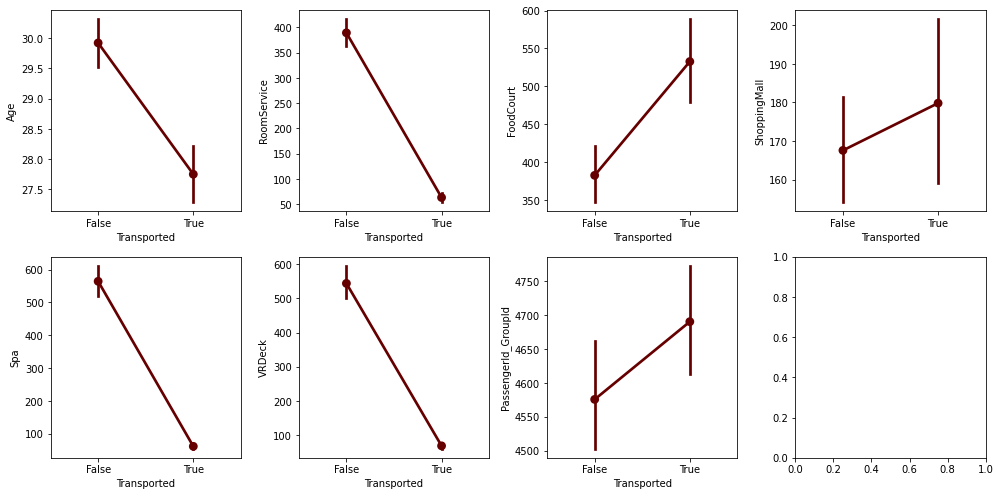

In [31]:
p=train.select_dtypes(include='number').columns.to_list()
p.append("Transported")
y=4
x=math.ceil((len(p)-1)/y)

plt.subplots(x,y,figsize=(14,7))

for i in range(1,len(p)-1) :
    plt.subplot(x,y,i)
    sns.pointplot(data=train[p],y=p[i-1],x='Transported',color='#660000')
plt.tight_layout()    
plt.show()

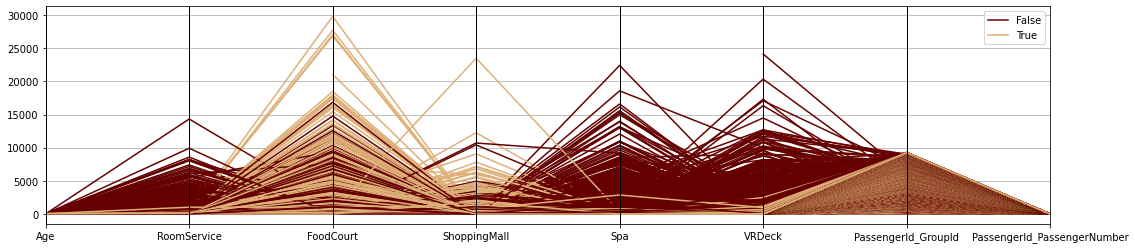

In [32]:
p=train.select_dtypes(include='number').columns.to_list()
p.append("Transported")
#p.remove("PassengerId_GroupId")
#p.remove('Age')
plt.figure(figsize=(18,4)) 
pd.plotting.parallel_coordinates(train[p], "Transported",color=('#660000','#DEB078'))
plt.show()

***
* Transported person tends to have less bill on spa, vrdeck & room service then the non transported person
* Transported person tends to have more bill on FoodCourt & Shopping Mall then the non transported person
***

### <b><span style='color:#DEB078'>4.4 |</span><span style='color:#660000'> Other Relationships leaving Target variable</span></b>  

In [33]:
fig = px.imshow(train.corr().round(2),zmin=-1,zmax=1, text_auto=True,width=1200,height=650,aspect=None,color_continuous_scale=['#660000','#DEB078'])
fig.show()

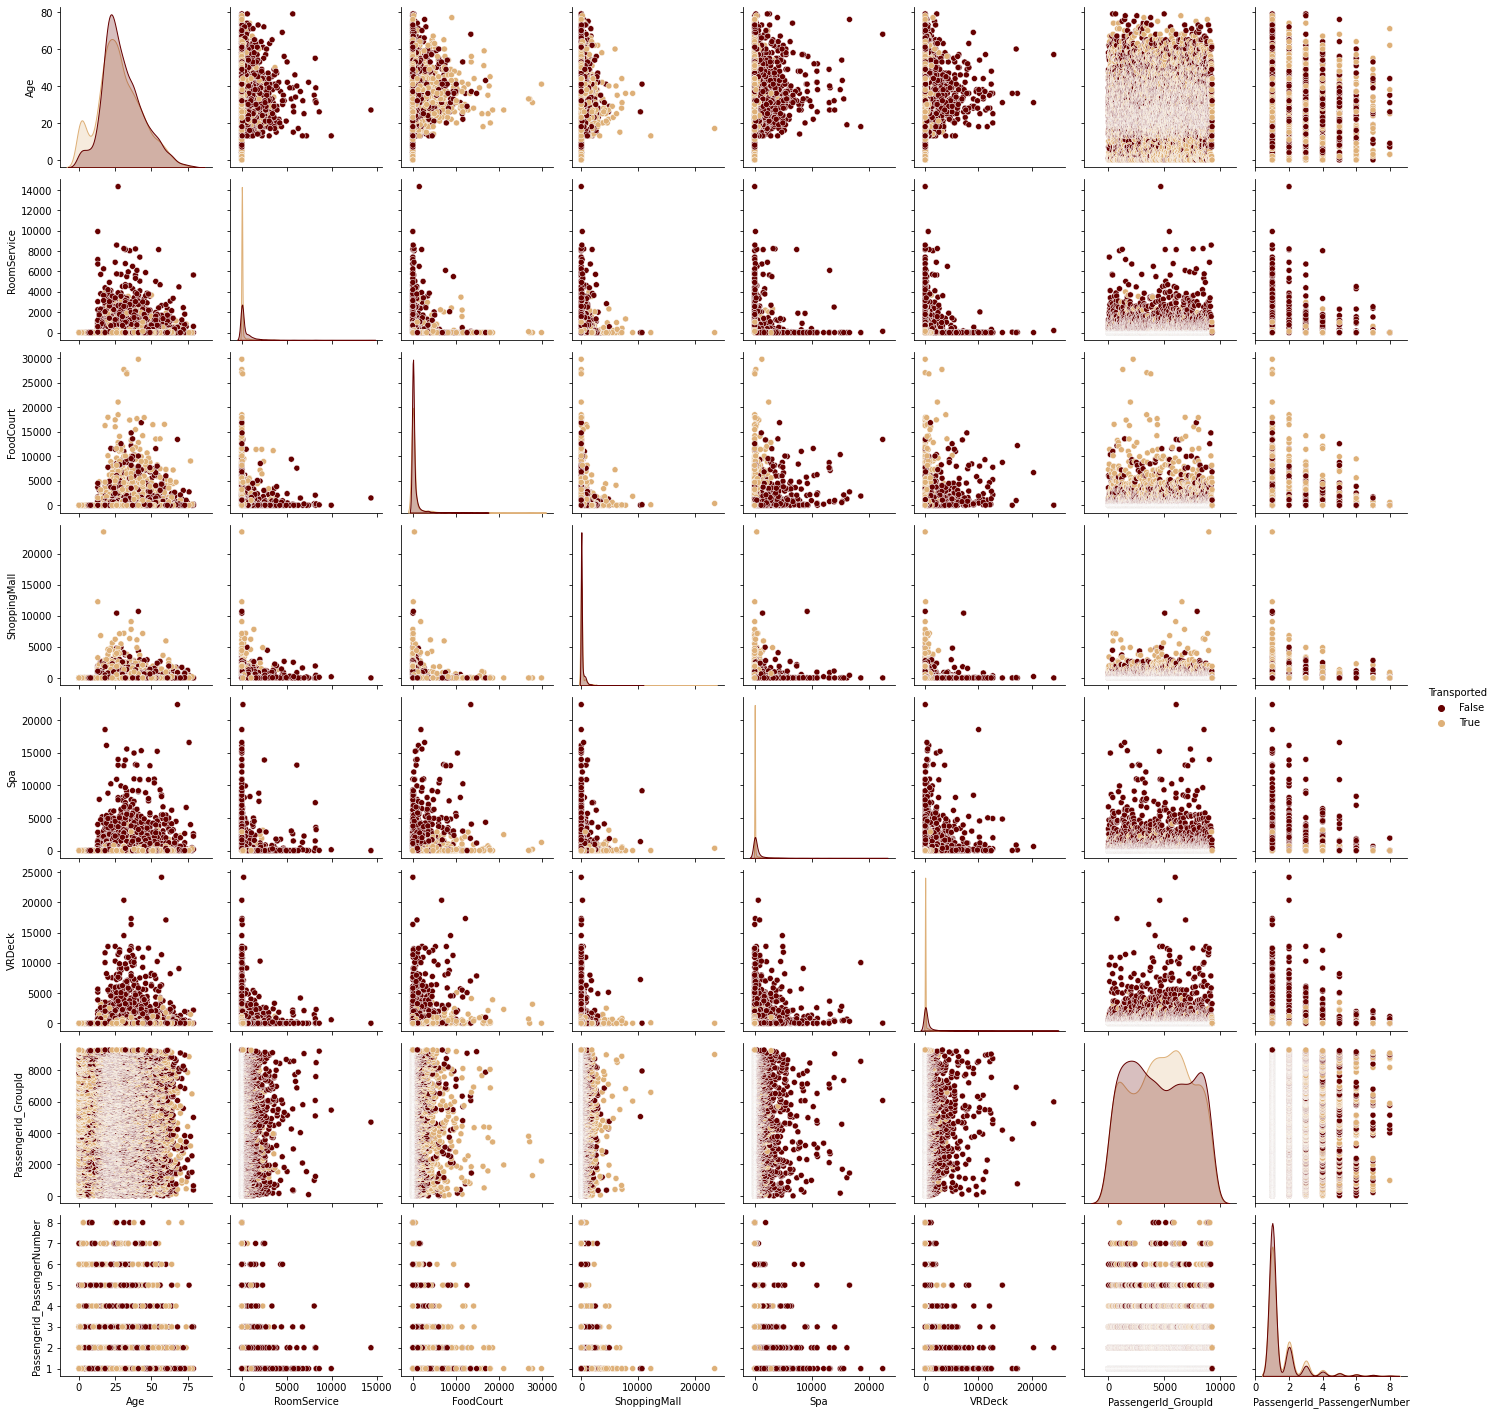

In [34]:
p=train.select_dtypes(include='number').columns.to_list()
p.append("Transported")
sns.pairplot(data=train[p],
                  hue='Transported'
             ,palette=['#660000','#DEB078']
)
                  
plt.show()

***
* No Strong Relationship Observerd among features 
* weak relationship observed among spa, vrdeck and food court
***

## <b><div style='padding:15px;background-color:#800000;color:#DEB078;border-radius:2px;font-size:110%;text-align: center'>5 | Feature Engineering</div></b>

### <b><span style='color:#DEB078'>5.1 |</span><span style='color:#660000'> Imputing Null Value </span></b>  

In [35]:
def ImputeNull(df):
    
    # Home planet 
    mode_HomePlanet = df['HomePlanet'].mode()[0]
    df['HomePlanet'].fillna(mode_HomePlanet,inplace=True)

    # CryoSleep
    mode_CryoSleep = df['CryoSleep'].mode()[0]
    df['CryoSleep'].fillna(mode_CryoSleep,inplace=True)

    # Destination
    mode_Destination = df['Destination'].mode()[0]
    df['Destination'].fillna(mode_Destination,inplace=True)

    # Age
    median_Age = df['Age'].median()
    df['Age'].fillna(median_Age,inplace=True)

    # VIP
    mode_VIP = df['VIP'].mode()
    df['VIP'].fillna(mode_VIP,inplace=True) 
    
    # RoomService
    median_RoomService = df['RoomService'].median()
    df['RoomService'].fillna(median_RoomService,inplace=True)
    
    # FoodCourt
    median_FoodCourt = df['FoodCourt'].median()
    df['FoodCourt'].fillna(median_FoodCourt,inplace=True)
    
    # ShoppingMall
    median_ShoppingMall = df['ShoppingMall'].median()
    df['ShoppingMall'].fillna(median_ShoppingMall,inplace=True)
    
    # Spa
    median_Spa = df['Spa'].median()
    df['Spa'].fillna(median_Spa,inplace=True)
    
    # VRDeck
    median_VRDeck = df['VRDeck'].median()
    df['VRDeck'].fillna(median_VRDeck,inplace=True)
    
    # Cabin_Deck
    mode_Cabin_Deck = df['Cabin_Deck'].mode()
    df['Cabin_Deck'].fillna(mode_Cabin_Deck,inplace=True) 
    
    # VIP
    mode_Cabin_Side = df['Cabin_Side'].mode()
    df['Cabin_Side'].fillna(mode_Cabin_Side,inplace=True) 
    
    return df
    

### <b><span style='color:#DEB078'>5.2 |</span><span style='color:#660000'> Label Encoding </span></b>  

In [36]:
def label_encoder(df):
    columns = ["HomePlanet", "CryoSleep","Cabin_Deck","Cabin_Side", "Destination" ,"VIP"]
    for col in columns:
        df[col] = df[col].astype(str)
        df[col] =  LabelEncoder().fit_transform(df[col])
    return df


### <b><span style='color:#DEB078'>5.3 |</span><span style='color:#660000'> Preprocessing Steps </span></b>  

In [37]:
def preProcess(df,impute_null):
    
    df=df.assign(
            PassengerId_GroupId=df['PassengerId'].str[:4].astype(np.int16),
            PassengerId_PassengerNumber=df['PassengerId'].str[5:].astype(np.int16)
         )
    
    df=df.assign( 
           Cabin_Deck=df["Cabin"].str.split("/").str[0],
           Cabin_Num=df["Cabin"].str.split("/").str[1],
           Cabin_Side=df["Cabin"].str.split("/").str[2]
         )
    
    df=df.drop(columns=['PassengerId','Cabin','PassengerId_PassengerNumber','Cabin_Num','Name'])
    
    if impute_null:
        df=ImputeNull(df)
    
    df=label_encoder(df)
    
    return df

## <b><div style='padding:15px;background-color:#800000;color:#DEB078;border-radius:2px;font-size:110%;text-align: center'>6 | Automated Model Using Lazypredict (Rows containing null dropped)</div></b>

### <b><span style='color:#DEB078'>6.1 |</span><span style='color:#660000'> Prepararation of Data For Model </span></b>  

In [38]:
df=df_raw[(train.isna().mean(axis=1).sort_values(ascending=False)<=0.0)]

X = df.drop('Transported' , axis =1 )
Y = df[['Transported']]


X=preProcess(X,impute_null=False)

X_train , X_test , Y_train , Y_test = train_test_split(X , Y, stratify=Y, random_state = 5 ,test_size =0.40)

### <b><span style='color:#DEB078'>6.2 |</span><span style='color:#660000'> Lazypredict Model Fitting </span></b>  

In [39]:
clf = LazyClassifier(verbose=0,
                     ignore_warnings=True,
                     custom_metric=None,
                     predictions=False,
                     random_state=12,
                     classifiers='all')

models, predictions = clf.fit(X_train , X_test , Y_train , Y_test)

100%|██████████| 29/29 [00:10<00:00,  2.77it/s]


### <b><span style='color:#DEB078'>6.3 |</span><span style='color:#660000'> Models Evaluation </span></b>  

In [40]:
models[:15] # Top 15

Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                    
LGBMClassifier              0.81               0.81     0.81      0.81   
AdaBoostClassifier          0.81               0.81     0.81      0.81   
XGBClassifier               0.80               0.80     0.80      0.80   
ExtraTreesClassifier        0.80               0.80     0.80      0.80   
SVC                         0.80               0.80     0.80      0.80   
RandomForestClassifier      0.80               0.80     0.80      0.80   
NuSVC                       0.80               0.80     0.80      0.80   
CalibratedClassifierCV      0.79               0.79     0.79      0.79   
LinearSVC                   0.79               0.79     0.79      0.79   
LogisticRegression          0.79               0.79     0.79      0.79   
BaggingClassifier           0.79               0.79     0.79      0.79   
KNeighborsClassifier        0.78               0.78     0.78      0.78   
SGDClassifier               0.78               0.78     0.78      0.78   
RidgeClassifierCV           0.77               0.77     0.77      0.77   
RidgeClassifier             0.77               0.77     0.77      0.77   

                        Time Taken  
Model                               
LGBMClassifier                0.25  
AdaBoostClassifier            0.30  
XGBClassifier                 0.78  
ExtraTreesClassifier          0.60  
SVC                           1.06  
RandomForestClassifier        0.76  
NuSVC                         1.22  
CalibratedClassifierCV        1.49  
LinearSVC                     0.38  
LogisticRegression            0.07  
BaggingClassifier             0.19  
KNeighborsClassifier          0.26  
SGDClassifier                 0.07  
RidgeClassifierCV             0.06  
RidgeClassifier               0.04

In [41]:
line = px.line(data_frame= models[:15] ,y =['Accuracy','Balanced Accuracy','ROC AUC','F1 Score'] , markers = True)
line.show()

### <b><span style='color:#DEB078'>6.4 |</span><span style='color:#660000'> Fitting one of the best Models from Lazypredict Result</span></b>  

In [42]:
from lightgbm import LGBMClassifier
lgbm = LGBMClassifier( random_state=5)
lgbm.fit(X, Y)

LGBMClassifier(random_state=5)

### <b><span style='color:#DEB078'>6.5 |</span><span style='color:#660000'> Prediction Using LGBM</span></b>  

In [43]:
test1=preProcess(test_raw,impute_null=False)
y_pred = lgbm.predict(test1)

In [44]:
submission['Transported'] = y_pred.astype("bool")
submission.to_csv("submission_nulls_dropped.csv",index=False)
submission.head()

PassengerId  Transported
0     0013_01         True
1     0018_01        False
2     0019_01         True
3     0021_01         True
4     0023_01         True

## <b><div style='padding:15px;background-color:#800000;color:#DEB078;border-radius:2px;font-size:110%;text-align: center'>7 | Automated Model Using Lazypredict (Nulls imputed)</div></b>

### <b><span style='color:#DEB078'>7.1 |</span><span style='color:#660000'> Prepararation of Data For Model </span></b>  

In [45]:
X = df_raw.drop('Transported' , axis =1 )
Y = df_raw[['Transported']]

X=preProcess(X,impute_null=True)
X_train , X_test , Y_train , Y_test = train_test_split(X , Y, stratify=Y, random_state = 5 ,test_size =0.40)

### <b><span style='color:#DEB078'>7.2 |</span><span style='color:#660000'> Lazypredict Model Fitting </span></b>  

In [46]:
clf = LazyClassifier(verbose=0,
                     ignore_warnings=True,
                     custom_metric=None,
                     predictions=False,
                     random_state=12,
                     classifiers='all')

models, predictions = clf.fit(X_train , X_test , Y_train , Y_test)

100%|██████████| 29/29 [00:14<00:00,  2.00it/s]


### <b><span style='color:#DEB078'>7.3 |</span><span style='color:#660000'> Models Evaluation </span></b>  

In [47]:
models[:15] # Top 15

Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                        
LGBMClassifier                  0.81               0.81     0.81      0.81   
RandomForestClassifier          0.80               0.80     0.80      0.80   
SVC                             0.80               0.80     0.80      0.80   
XGBClassifier                   0.80               0.80     0.80      0.80   
NuSVC                           0.80               0.80     0.80      0.80   
AdaBoostClassifier              0.79               0.79     0.79      0.79   
LogisticRegression              0.79               0.79     0.79      0.79   
ExtraTreesClassifier            0.79               0.79     0.79      0.79   
LinearSVC                       0.79               0.79     0.79      0.79   
CalibratedClassifierCV          0.79               0.79     0.79      0.79   
SGDClassifier                   0.78               0.78     0.78      0.78   
BaggingClassifier               0.77               0.77     0.77      0.77   
KNeighborsClassifier            0.77               0.77     0.77      0.77   
LinearDiscriminantAnalysis      0.76               0.76     0.76      0.76   
RidgeClassifier                 0.76               0.76     0.76      0.76   

                            Time Taken  
Model                                   
LGBMClassifier                    0.21  
RandomForestClassifier            0.94  
SVC                               1.70  
XGBClassifier                     0.82  
NuSVC                             2.02  
AdaBoostClassifier                0.36  
LogisticRegression                0.07  
ExtraTreesClassifier              0.76  
LinearSVC                         0.50  
CalibratedClassifierCV            1.87  
SGDClassifier                     0.13  
BaggingClassifier                 0.24  
KNeighborsClassifier              0.35  
LinearDiscriminantAnalysis        0.12  
RidgeClassifier                   0.04

In [48]:
line = px.line(data_frame= models[:15] ,y =['Accuracy','Balanced Accuracy','ROC AUC','F1 Score'] , markers = True)
line.show()

### <b><span style='color:#DEB078'>7.4 |</span><span style='color:#660000'> Fitting one of the best Models from Lazypredict Result</span></b>  

In [49]:
from lightgbm import LGBMClassifier
lgbm = LGBMClassifier( random_state=5)
lgbm.fit(X, Y)

LGBMClassifier(random_state=5)

### <b><span style='color:#DEB078'>7.5 |</span><span style='color:#660000'> Prediction Using LGBM</span></b>  

In [50]:
test1=preProcess(test_raw,impute_null=True)
y_pred = lgbm.predict(test1)

In [51]:
submission['Transported'] = y_pred.astype("bool")
submission.to_csv("submission_nulls_imputed.csv",index=False)
submission.head()

PassengerId  Transported
0     0013_01         True
1     0018_01        False
2     0019_01         True
3     0021_01         True
4     0023_01         True

## <b><div style='padding:15px;background-color:#800000;color:#DEB078;border-radius:2px;font-size:110%;text-align: center'>8 | Automated Model Using Lazypredict (Nulls as it is)</div></b>

### <b><span style='color:#DEB078'>8.1 |</span><span style='color:#660000'> Prepararation of Data For Model </span></b>  

In [52]:
X = df_raw.drop('Transported' , axis =1 )
Y = df_raw[['Transported']]

X=preProcess(X,impute_null=False)
X_train , X_test , Y_train , Y_test = train_test_split(X , Y, stratify=Y, random_state = 5 ,test_size =0.40)

### <b><span style='color:#DEB078'>8.2 |</span><span style='color:#660000'> Lazypredict Model Fitting </span></b>  

In [53]:
clf = LazyClassifier(verbose=0,
                     ignore_warnings=True,
                     custom_metric=None,
                     predictions=False,
                     random_state=12,
                     classifiers='all')

models, predictions = clf.fit(X_train , X_test , Y_train , Y_test)

100%|██████████| 29/29 [00:14<00:00,  2.05it/s]


### <b><span style='color:#DEB078'>8.3 |</span><span style='color:#660000'> Models Evaluation </span></b>  

In [54]:
models[:15] # Top 15

Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                        
LGBMClassifier                  0.81               0.81     0.81      0.81   
RandomForestClassifier          0.80               0.80     0.80      0.80   
SVC                             0.80               0.80     0.80      0.80   
NuSVC                           0.80               0.80     0.80      0.80   
AdaBoostClassifier              0.80               0.80     0.80      0.80   
XGBClassifier                   0.80               0.80     0.80      0.80   
ExtraTreesClassifier            0.80               0.80     0.80      0.80   
BaggingClassifier               0.79               0.79     0.79      0.79   
CalibratedClassifierCV          0.79               0.79     0.79      0.79   
LinearSVC                       0.79               0.79     0.79      0.79   
LogisticRegression              0.79               0.79     0.79      0.79   
SGDClassifier                   0.78               0.78     0.78      0.78   
KNeighborsClassifier            0.77               0.77     0.77      0.77   
LinearDiscriminantAnalysis      0.76               0.76     0.76      0.76   
RidgeClassifierCV               0.76               0.76     0.76      0.76   

                            Time Taken  
Model                                   
LGBMClassifier                    0.20  
RandomForestClassifier            0.97  
SVC                               1.67  
NuSVC                             2.03  
AdaBoostClassifier                0.36  
XGBClassifier                     0.83  
ExtraTreesClassifier              0.79  
BaggingClassifier                 0.25  
CalibratedClassifierCV            1.91  
LinearSVC                         0.52  
LogisticRegression                0.04  
SGDClassifier                     0.11  
KNeighborsClassifier              0.39  
LinearDiscriminantAnalysis        0.10  
RidgeClassifierCV                 0.06

In [55]:
line = px.line(data_frame= models[:15] ,y =['Accuracy','Balanced Accuracy','ROC AUC','F1 Score'] , markers = True)
line.show()

### <b><span style='color:#DEB078'>8.4 |</span><span style='color:#660000'> Fitting one of the best Models from Lazypredict Result</span></b>  

In [56]:
from lightgbm import LGBMClassifier
lgbm = LGBMClassifier( random_state=5)
lgbm.fit(X, Y)

LGBMClassifier(random_state=5)

### <b><span style='color:#DEB078'>8.5 |</span><span style='color:#660000'> Prediction Using LGBM</span></b>  

In [57]:
test1=preProcess(test_raw,impute_null=False)
y_pred = lgbm.predict(test1)

In [58]:
submission['Transported'] = y_pred.astype("bool")
submission.to_csv("submission_nulls_as_it_is.csv",index=False)
submission.head()

PassengerId  Transported
0     0013_01         True
1     0018_01        False
2     0019_01         True
3     0021_01         True
4     0023_01         True

## <b><div style='padding:15px;background-color:#800000;color:#DEB078;border-radius:2px;font-size:110%;text-align: center'>9 | Setup for next Model Selection & Evaluation</div></b>

In [59]:
All_Model_Predictions=pd.DataFrame()
All_Model_Stats=pd.DataFrame(columns=['MODEL_NAME','MODEL_CONDITION','TRAIN_ACCURACY','VALIDATION_ACCURACY','MODEL_INSTANCE_USED'])

In [60]:
random_value=5

In [61]:
test=test_raw.copy()
X = df_raw.drop('Transported' , axis =1 )
Y = df_raw[['Transported']]

X.loc[:,'TYPE']='Train'
test.loc[:,'TYPE']='Test'

res=preProcess(pd.concat([X,test]),impute_null=True)

X = res[res['TYPE']=='Train'].drop(columns='TYPE')
test = res[res['TYPE']=='Test'].drop(columns='TYPE')

In [62]:
X_train , X_validation , Y_train , Y_validation = train_test_split(X , Y, stratify=Y, random_state = random_value ,test_size =0.30)

In [63]:
All_Model_Predictions = pd.concat([All_Model_Predictions, Y_validation], axis=1).reset_index(drop=True)
All_Model_Predictions = All_Model_Predictions.rename(columns={'Transported':'Target_Variable'})

## <b><div style='padding:15px;background-color:#800000;color:#DEB078;border-radius:2px;font-size:110%;text-align: center'>10 | Manual Linear Models Without Parameter Tuning</div></b>

### <b><span style='color:#DEB078'>10.1 |</span><span style='color:#660000'> Data Setup</span></b>  

In [64]:
sc=StandardScaler()

X_train_scaled=X_train.copy()
X_validation_scaled=X_validation.copy()

X_train_scaled[['Age','RoomService','FoodCourt','ShoppingMall','Spa','VRDeck','PassengerId_GroupId']]=sc.fit_transform(X_train_scaled[
                                                                                                    ['Age','RoomService','FoodCourt','ShoppingMall',
                                                                                                     'Spa','VRDeck','PassengerId_GroupId']])

X_validation_scaled[['Age','RoomService','FoodCourt','ShoppingMall','Spa','VRDeck','PassengerId_GroupId']]=sc.transform(X_validation_scaled[
                                                                                                    ['Age','RoomService','FoodCourt','ShoppingMall',
                                                                                                     'Spa','VRDeck','PassengerId_GroupId']])

In [65]:
columns=['MODEL_NAME','MODEL_CONDITION','TRAIN_ACCURACY','VALIDATION_ACCURACY','MODEL_INSTANCE_USED','IDENTIFIER']
results_collection=pd.DataFrame(columns=columns)

models_predictions=pd.DataFrame()

### <b><span style='color:#DEB078'>10.2 |</span><span style='color:#660000'> Model Training and Performance Stats</span></b>  

In [66]:
linear_models = {
                "LR"  : LogisticRegression(random_state=random_value),
                "RC"  : RidgeClassifier(random_state=random_value),
                "SGD" : SGDClassifier(random_state=random_value),
                "LSVC": LinearSVC(random_state=random_value),
                "LDA" : LinearDiscriminantAnalysis(),
                "SVC" : SVC(random_state=random_value)
                }
linear_models

{'LR': LogisticRegression(random_state=5),
 'RC': RidgeClassifier(random_state=5),
 'SGD': SGDClassifier(random_state=5),
 'LSVC': LinearSVC(random_state=5),
 'LDA': LinearDiscriminantAnalysis(),
 'SVC': SVC(random_state=5)}

In [67]:
kf = StratifiedKFold( n_splits=10 ,shuffle=True, random_state=random_value)
scoring_method = 'accuracy'

In [68]:
model_stats=pd.DataFrame()

print('*'*25)

for name, model in linear_models.items():
    
    cv_score=cross_val_score(model,X_train_scaled,Y_train,scoring='accuracy',cv=kf)   
    res=pd.Series(cv_score).reset_index().rename(columns={0:scoring_method,'index':'Fold'})
    res['Model']=str(name)
    model_stats=pd.concat([model_stats,res])
    
    msg = "%s: Train Score -> %f (SD %f)" % (name, cv_score.mean(), cv_score.std())
    print(msg)
    
    
    model.fit(X_train_scaled,Y_train) 
    y_pred_model = model.predict(X_validation_scaled)
    print('Validation Score -> ', metrics.accuracy_score(y_pred_model,Y_validation))
    
    temp_var={'MODEL_NAME':name,'MODEL_CONDITION':'Default_Parameter','TRAIN_ACCURACY':cv_score.mean(),
              'VALIDATION_ACCURACY':metrics.accuracy_score(y_pred_model,Y_validation),
              'MODEL_INSTANCE_USED':model,
              'IDENTIFIER':name+'_Base'
             
             }
    results_collection = results_collection.append(temp_var, ignore_index = True)
    models_predictions[name+'_Base']=y_pred_model
    
    
    print('*'*25)
    
    
fig1 = px.line(model_stats, x="Fold", y=scoring_method, color='Model')
fig1.show()

fig2 = px.box(model_stats, x="Model", y=scoring_method,color='Model')
fig2.update_layout(showlegend=False)
fig2.show()    

*************************
LR: Train Score -> 0.782254 (SD 0.013307)
Validation Score ->  0.7944785276073619
*************************
RC: Train Score -> 0.766149 (SD 0.015838)
Validation Score ->  0.7569018404907976
*************************
SGD: Train Score -> 0.778807 (SD 0.016294)
Validation Score ->  0.7925613496932515
*************************
LSVC: Train Score -> 0.781269 (SD 0.014526)
Validation Score ->  0.7887269938650306
*************************
LDA: Train Score -> 0.765821 (SD 0.016245)
Validation Score ->  0.7569018404907976
*************************
SVC: Train Score -> 0.791787 (SD 0.015645)
Validation Score ->  0.7871932515337423
*************************


In [69]:
results_collection

MODEL_NAME    MODEL_CONDITION  TRAIN_ACCURACY  VALIDATION_ACCURACY  \
0         LR  Default_Parameter            0.78                 0.79   
1         RC  Default_Parameter            0.77                 0.76   
2        SGD  Default_Parameter            0.78                 0.79   
3       LSVC  Default_Parameter            0.78                 0.79   
4        LDA  Default_Parameter            0.77                 0.76   
5        SVC  Default_Parameter            0.79                 0.79   

                  MODEL_INSTANCE_USED IDENTIFIER  
0  LogisticRegression(random_state=5)    LR_Base  
1     RidgeClassifier(random_state=5)    RC_Base  
2       SGDClassifier(random_state=5)   SGD_Base  
3           LinearSVC(random_state=5)  LSVC_Base  
4        LinearDiscriminantAnalysis()   LDA_Base  
5                 SVC(random_state=5)   SVC_Base

In [70]:
models_predictions.head(5)

LR_Base  RC_Base  SGD_Base  LSVC_Base  LDA_Base  SVC_Base
0     True     True      True       True      True      True
1    False    False     False      False     False     False
2     True    False      True       True     False     False
3    False    False     False      False     False     False
4     True     True      True       True      True      True

In [71]:
All_Model_Stats = All_Model_Stats.append(results_collection, ignore_index = True)
All_Model_Predictions = pd.concat([All_Model_Predictions, models_predictions], axis=1)

### <b><span style='color:#DEB078'>10.3 |</span><span style='color:#660000'> Prediction and Submission</span></b>  

In [72]:
test1=test.copy()
test1[['Age','RoomService','FoodCourt','ShoppingMall','Spa','VRDeck','PassengerId_GroupId']]=sc.transform(test1[
                                                                                                    ['Age','RoomService','FoodCourt','ShoppingMall',
                                                                                                     'Spa','VRDeck','PassengerId_GroupId']])

In [73]:
LR_Base = LogisticRegression(random_state=5)
LR_Base.fit(X_train_scaled,Y_train) 

y_pred_LR_Base = LR_Base.predict(X_validation_scaled)

print(metrics.accuracy_score(y_pred_LR_Base,Y_validation))

0.7944785276073619


In [74]:
# For LR_Base -> competition score -> 0.78793
test_pred_LR_Base =LR_Base.predict(test1)
submission['Transported'] = test_pred_LR_Base.astype("bool")
submission.to_csv("submission_LR_Base.csv",index=False)
submission.head()

PassengerId  Transported
0     0013_01         True
1     0018_01        False
2     0019_01         True
3     0021_01         True
4     0023_01         True

In [75]:
SVC_Base = SVC(random_state=5)
SVC_Base.fit(X_train_scaled,Y_train)

y_pred_SVC_Base = SVC_Base.predict(X_validation_scaled)

print(metrics.accuracy_score(y_pred_SVC_Base,Y_validation))

0.7871932515337423


In [76]:
# For SVC_Base -> competition score -> 0.79354
test_pred_SVC_Base =SVC_Base.predict(test1)
submission['Transported'] = test_pred_SVC_Base.astype("bool")
submission.to_csv("submission_SVC_Base.csv",index=False)
submission.head()

PassengerId  Transported
0     0013_01         True
1     0018_01        False
2     0019_01         True
3     0021_01         True
4     0023_01        False

## <b><div style='padding:15px;background-color:#800000;color:#DEB078;border-radius:2px;font-size:110%;text-align: center'>11 | Manual Linear Models With Parameter Tuning</div></b>

### <b><span style='color:#DEB078'>11.1 |</span><span style='color:#660000'>Setup</span></b>  

In [77]:
columns=['MODEL_NAME','MODEL_CONDITION','TRAIN_ACCURACY','VALIDATION_ACCURACY','MODEL_INSTANCE_USED','IDENTIFIER']
results_collection=pd.DataFrame(columns=columns)

models_predictions=pd.DataFrame()

### <b><span style='color:#DEB078'>11.2 |</span><span style='color:#660000'> Model Training and Performance Stats</span></b>  

In [78]:
linear_models = {
                "LR"  : LogisticRegression(random_state=random_value),
                "RC"  : RidgeClassifier(random_state=random_value),
                "SGD" : SGDClassifier(random_state=random_value),
                "LSVC": LinearSVC(random_state=random_value),
                "LDA" : LinearDiscriminantAnalysis(),
                "SVC" : SVC(random_state=random_value)
                }
linear_models

{'LR': LogisticRegression(random_state=5),
 'RC': RidgeClassifier(random_state=5),
 'SGD': SGDClassifier(random_state=5),
 'LSVC': LinearSVC(random_state=5),
 'LDA': LinearDiscriminantAnalysis(),
 'SVC': SVC(random_state=5)}

In [79]:
parameter_grid=  {
                    'LR':{
                            'penalty': ['l1', 'l2'],
                                  'C': [0.98, 1.00, 1.02],
                                'tol': [1e-7, 1e-8, 1e-9],
                           'max_iter': range(100, 250, 50)             
                          } ,
    
                     'RC':{
                            'alpha': np.arange(0.00, 1.0, 0.05),
                            'tol': [1e-7, 1e-8, 1e-9],
                           'max_iter': range(100, 250, 50)             
                          } ,
    
                   'SGD' :{
                            'alpha': [1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3], # learning rate
                            #'n_iter': [1000], # number of epochs
                            #'loss': ['log'], # logistic regression,
                            'penalty': ['l2'],
                            #'n_jobs': [-1]
                        },
                    'LDA' : {
                        'solver': ['svd', 'lsqr'],
                        'n_components': [None] + [1, 2, 5, 8, 13, 21, 34, 55],
                        'store_covariance': [True, False],
                        'tol': [1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-7, 1e-8, 1e-9, 1e-10, 1e-11, 1e-12, 1e-13, 1e-14, 1e-15]
                        },
                    'SVC' :{
                        'C': [0.1, 1, 10, 100, 1000], 
                        'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                        #'kernel': ['rbf']
                        'kernel': ['rbf']
                       } ,
                    'LSVC' :{
                        'C': [0.1, 1, 10, 100, 1000]
                       } 
    
    
                  }


In [80]:
for name, model in linear_models.items():
    print('\n'+'*'*25+' MODEL -> '+name+' '+'*'*25+'\n')
    
    model_gv = GridSearchCV( model, parameter_grid[name] , scoring='accuracy' , cv=kf)
    model_gv.fit(X_train_scaled,Y_train)
    
    print('Training model_gv.best_score_  ->  ',model_gv.best_score_)
    print('model_gv.best_estimator_ -> ',model_gv.best_estimator_)
    print('model_gv.best_params_ -> ',model_gv.best_params_)
    print('model_gv.best_index_ -> ',model_gv.best_index_) 
    
    y_pred_model_gv = model_gv.predict(X_validation_scaled)
    print('Validation Score -> ', metrics.accuracy_score(y_pred_model_gv,Y_validation))
    
    temp_var={'MODEL_NAME':name,'MODEL_CONDITION':'With Parameter Tuning','TRAIN_ACCURACY':model_gv.best_score_,
              'VALIDATION_ACCURACY':metrics.accuracy_score(y_pred_model_gv,Y_validation),
              'MODEL_INSTANCE_USED':model_gv.best_estimator_,
              'IDENTIFIER':name+'_With_GSV'
             
             }
    results_collection = results_collection.append(temp_var, ignore_index = True)
    models_predictions[name+'_With_GSV']=y_pred_model_gv
    


************************* MODEL -> LR *************************

Training model_gv.best_score_  ->   0.782418600380261
model_gv.best_estimator_ ->  LogisticRegression(C=0.98, random_state=5, tol=1e-07)
model_gv.best_params_ ->  {'C': 0.98, 'max_iter': 100, 'penalty': 'l2', 'tol': 1e-07}
model_gv.best_index_ ->  3
Validation Score ->  0.7944785276073619

************************* MODEL -> RC *************************

Training model_gv.best_score_  ->   0.7661494793017025
model_gv.best_estimator_ ->  RidgeClassifier(alpha=0.6000000000000001, max_iter=100, random_state=5,
                tol=1e-07)
model_gv.best_params_ ->  {'alpha': 0.6000000000000001, 'max_iter': 100, 'tol': 1e-07}
model_gv.best_index_ ->  108
Validation Score ->  0.7569018404907976

************************* MODEL -> SGD *************************

Training model_gv.best_score_  ->   0.7797924228675136
model_gv.best_estimator_ ->  SGDClassifier(alpha=0.01, random_state=5)
model_gv.best_params_ ->  {'alpha': 0.01, 'pen

In [81]:
results_collection

MODEL_NAME        MODEL_CONDITION  TRAIN_ACCURACY  VALIDATION_ACCURACY  \
0         LR  With Parameter Tuning            0.78                 0.79   
1         RC  With Parameter Tuning            0.77                 0.76   
2        SGD  With Parameter Tuning            0.78                 0.79   
3       LSVC  With Parameter Tuning            0.78                 0.79   
4        LDA  With Parameter Tuning            0.77                 0.76   
5        SVC  With Parameter Tuning            0.80                 0.80   

                                 MODEL_INSTANCE_USED     IDENTIFIER  
0  LogisticRegression(C=0.98, random_state=5, tol...    LR_With_GSV  
1  RidgeClassifier(alpha=0.6000000000000001, max_...    RC_With_GSV  
2          SGDClassifier(alpha=0.01, random_state=5)   SGD_With_GSV  
3                   LinearSVC(C=0.1, random_state=5)  LSVC_With_GSV  
4  LinearDiscriminantAnalysis(store_covariance=Tr...   LDA_With_GSV  
5                SVC(C=1, gamma=0.1, random_state=5)   SVC_With_GSV

In [82]:
models_predictions.head(5)

LR_With_GSV  RC_With_GSV  SGD_With_GSV  LSVC_With_GSV  LDA_With_GSV  \
0         True         True          True           True          True   
1        False        False         False          False         False   
2         True        False          True           True         False   
3        False        False         False          False         False   
4         True         True          True           True          True   

   SVC_With_GSV  
0          True  
1         False  
2          True  
3         False  
4          True

In [83]:
All_Model_Stats = All_Model_Stats.append(results_collection, ignore_index = True)
All_Model_Predictions = pd.concat([All_Model_Predictions, models_predictions], axis=1)

### <b><span style='color:#DEB078'>11.3 |</span><span style='color:#660000'> Prediction and Submission</span></b>  

In [84]:
test1=test.copy()
test1[['Age','RoomService','FoodCourt','ShoppingMall','Spa','VRDeck','PassengerId_GroupId']]=sc.transform(test1[
                                                                                                    ['Age','RoomService','FoodCourt','ShoppingMall',
                                                                                                     'Spa','VRDeck','PassengerId_GroupId']])

In [85]:
LR_With_GSV = LogisticRegression(C=0.98, random_state=5, tol=1e-07)
LR_With_GSV.fit(X_train_scaled,Y_train) 

y_pred_LR_With_GSV = LR_With_GSV.predict(X_validation_scaled)

print(metrics.accuracy_score(y_pred_LR_With_GSV,Y_validation))

0.7944785276073619


In [86]:
# For LR_With_GSV 
test_pred_LR_With_GSV=LR_With_GSV.predict(test1)
submission['Transported'] = test_pred_LR_With_GSV.astype("bool")
submission.to_csv("submission_LR_With_GSV.csv",index=False)
submission.head()

PassengerId  Transported
0     0013_01         True
1     0018_01        False
2     0019_01         True
3     0021_01         True
4     0023_01         True

In [87]:
SGD_With_GSV = SGDClassifier(alpha=0.01, random_state=5)
SGD_With_GSV.fit(X_train_scaled,Y_train) 

y_pred_SGD_With_GSV = SGD_With_GSV.predict(X_validation_scaled)

print(metrics.accuracy_score(y_pred_SGD_With_GSV,Y_validation))

0.7929447852760736


In [88]:
# For SGD_With_GSV 
test_pred_SGD_With_GSV = SGD_With_GSV.predict(test1)
submission['Transported'] = test_pred_SGD_With_GSV.astype("bool")
submission.to_csv("submission_SGD_With_GSV.csv",index=False)
submission.head()

PassengerId  Transported
0     0013_01         True
1     0018_01        False
2     0019_01         True
3     0021_01         True
4     0023_01         True

In [89]:
SVC_With_GSV = SVC(C=1, gamma=0.1, random_state=5)
SVC_With_GSV.fit(X_train_scaled,Y_train)

y_pred_SVC_With_GSV = SVC_With_GSV.predict(X_validation_scaled)

print(metrics.accuracy_score(y_pred_SVC_With_GSV,Y_validation))

0.8002300613496932


In [90]:
# For SVC_With_GSV -> competition score -> 0.80149
test_pred_SVC_With_GSV = SVC_With_GSV.predict(test1)
submission['Transported'] = test_pred_SVC_With_GSV.astype("bool")
submission.to_csv("submission_SVC_With_GSV.csv",index=False)
submission.head()

PassengerId  Transported
0     0013_01         True
1     0018_01        False
2     0019_01         True
3     0021_01         True
4     0023_01        False

## <b><div style='padding:15px;background-color:#800000;color:#DEB078;border-radius:2px;font-size:110%;text-align: center'>12 | Manual Tree Models Without Parameter Tuning</div></b>

### <b><span style='color:#DEB078'>12.1 |</span><span style='color:#660000'> Setup</span></b>  

In [91]:
columns=['MODEL_NAME','MODEL_CONDITION','TRAIN_ACCURACY','VALIDATION_ACCURACY','MODEL_INSTANCE_USED','IDENTIFIER']
results_collection=pd.DataFrame(columns=columns)

models_predictions=pd.DataFrame()

### <b><span style='color:#DEB078'>12.2 |</span><span style='color:#660000'> Model Training and Performance Stats</span></b>  

In [92]:
tree_models = {
                "DTC" : DecisionTreeClassifier(random_state=random_value),
                "ETC" : ExtraTreeClassifier(random_state=random_value)    
                }
tree_models

{'DTC': DecisionTreeClassifier(random_state=5),
 'ETC': ExtraTreeClassifier(random_state=5)}

In [93]:
kf = StratifiedKFold( n_splits=10 ,shuffle=True, random_state=random_value)
scoring_method = 'accuracy'

In [94]:
model_stats=pd.DataFrame()

print('*'*25)

for name, model in tree_models.items():
    
    cv_score=cross_val_score(model,X_train,Y_train,scoring='accuracy',cv=kf)   
    res=pd.Series(cv_score).reset_index().rename(columns={0:scoring_method,'index':'Fold'})
    res['Model']=str(name)
    model_stats=pd.concat([model_stats,res])
    
    msg = "%s: Train Score -> %f (SD %f)" % (name, cv_score.mean(), cv_score.std())
    print(msg)
    
    
    model.fit(X_train,Y_train) 
    y_pred_model = model.predict(X_validation)
    print('Validation Score -> ', metrics.accuracy_score(y_pred_model,Y_validation))
    
    temp_var={'MODEL_NAME':name,'MODEL_CONDITION':'Default_Parameter','TRAIN_ACCURACY':cv_score.mean(),
              'VALIDATION_ACCURACY':metrics.accuracy_score(y_pred_model,Y_validation),
              'MODEL_INSTANCE_USED':model,
              'IDENTIFIER':name+'_Base'
             
             }
    results_collection = results_collection.append(temp_var, ignore_index = True)
    models_predictions[name+'_Base']=y_pred_model
    
    
    print('*'*25)
    
    
fig1 = px.line(model_stats, x="Fold", y=scoring_method, color='Model')
fig1.show()

fig2 = px.box(model_stats, x="Model", y=scoring_method,color='Model')
fig2.update_layout(showlegend=False)
fig2.show()    

*************************
DTC: Train Score -> 0.739855 (SD 0.019230)
Validation Score ->  0.7388803680981595
*************************
ETC: Train Score -> 0.730812 (SD 0.012472)
Validation Score ->  0.727760736196319
*************************


In [95]:
All_Model_Stats = All_Model_Stats.append(results_collection, ignore_index = True)
All_Model_Predictions = pd.concat([All_Model_Predictions, models_predictions], axis=1)

## <b><div style='padding:15px;background-color:#800000;color:#DEB078;border-radius:2px;font-size:110%;text-align: center'>13 | Manual Tree Models With Parameter Tuning</div></b>

### <b><span style='color:#DEB078'>13.1 |</span><span style='color:#660000'> Setup</span></b>  

In [96]:
columns=['MODEL_NAME','MODEL_CONDITION','TRAIN_ACCURACY','VALIDATION_ACCURACY','MODEL_INSTANCE_USED','IDENTIFIER']
results_collection=pd.DataFrame(columns=columns)

models_predictions=pd.DataFrame()

### <b><span style='color:#DEB078'>13.2 |</span><span style='color:#660000'> Model Training and Performance Stats</span></b>  

In [97]:
tree_parameter_grid=  {
                    'DTC':{
                            'criterion':['gini', 'entropy'],
                            'min_samples_leaf': [5, 10, 20, 50, 100],
                            'max_depth':[2,4,6,8,10,12,14,16,18]              
                          } ,
    
                     'ETC':{
                            'criterion':['gini', 'entropy'],
                            'min_samples_leaf': [5, 10, 20, 50, 100],
                            'max_depth':[2,4,6,8,10,12,14,16,18]              
                          } 
                  }


In [98]:
for name, model in tree_models.items():
    print('\n'+'*'*25+' MODEL -> '+name+' '+'*'*25+'\n')
    
    model_gv = GridSearchCV( model, tree_parameter_grid[name] , scoring='accuracy' , cv=kf)
    model_gv.fit(X_train,Y_train)
    
    print('Training model_gv.best_score_  ->  ',model_gv.best_score_)
    print('model_gv.best_estimator_ -> ',model_gv.best_estimator_)
    print('model_gv.best_params_ -> ',model_gv.best_params_)
    print('model_gv.best_index_ -> ',model_gv.best_index_) 
    
    y_pred_model_gv = model_gv.predict(X_validation)
    print('Validation Score -> ', metrics.accuracy_score(y_pred_model_gv,Y_validation))
    
    temp_var={'MODEL_NAME':name,'MODEL_CONDITION':'With Parameter Tuning','TRAIN_ACCURACY':model_gv.best_score_,
              'VALIDATION_ACCURACY':metrics.accuracy_score(y_pred_model_gv,Y_validation),
              'MODEL_INSTANCE_USED':model_gv.best_estimator_,
              'IDENTIFIER':name+'_With_GSV'
             
             }
    results_collection = results_collection.append(temp_var, ignore_index = True)
    models_predictions[name+'_With_GSV']=y_pred_model_gv


************************* MODEL -> DTC *************************

Training model_gv.best_score_  ->   0.7740452964307318
model_gv.best_estimator_ ->  DecisionTreeClassifier(max_depth=14, min_samples_leaf=50, random_state=5)
model_gv.best_params_ ->  {'criterion': 'gini', 'max_depth': 14, 'min_samples_leaf': 50}
model_gv.best_index_ ->  33
Validation Score ->  0.7910276073619632

************************* MODEL -> ETC *************************

Training model_gv.best_score_  ->   0.7433127538674272
model_gv.best_estimator_ ->  ExtraTreeClassifier(criterion='entropy', max_depth=18, min_samples_leaf=5,
                    random_state=5)
model_gv.best_params_ ->  {'criterion': 'entropy', 'max_depth': 18, 'min_samples_leaf': 5}
model_gv.best_index_ ->  85
Validation Score ->  0.745398773006135


### <b><span style='color:#DEB078'>13.3 |</span><span style='color:#660000'> Prediction and Submission</span></b>  

In [99]:
test1=test.copy()

In [100]:
dtc_With_GSV = DecisionTreeClassifier( max_depth=14, min_samples_leaf=50, random_state=5 )
dtc_With_GSV.fit(X_train,Y_train)

y_pred = dtc_With_GSV.predict(X_validation)

print(metrics.accuracy_score(y_pred,Y_validation))

0.7910276073619632


In [101]:
# For dtc_With_GSV -> competition score -> 0.78466
test_pred_dtc_With_GSV = dtc_With_GSV.predict(test1)
submission['Transported'] = test_pred_dtc_With_GSV.astype("bool")
submission.to_csv("submission_dtc_With_GSV.csv",index=False)
submission.head()

PassengerId  Transported
0     0013_01        False
1     0018_01        False
2     0019_01         True
3     0021_01         True
4     0023_01         True

## <b><div style='padding:15px;background-color:#800000;color:#DEB078;border-radius:2px;font-size:110%;text-align: center'>14 | Model Performance So Far</div></b>

In [102]:
All_Model_Stats.sort_values(by='VALIDATION_ACCURACY',ascending=False)

MODEL_NAME        MODEL_CONDITION  TRAIN_ACCURACY  VALIDATION_ACCURACY  \
11        SVC  With Parameter Tuning            0.80                 0.80   
0          LR      Default_Parameter            0.78                 0.79   
6          LR  With Parameter Tuning            0.78                 0.79   
8         SGD  With Parameter Tuning            0.78                 0.79   
2         SGD      Default_Parameter            0.78                 0.79   
3        LSVC      Default_Parameter            0.78                 0.79   
9        LSVC  With Parameter Tuning            0.78                 0.79   
5         SVC      Default_Parameter            0.79                 0.79   
1          RC      Default_Parameter            0.77                 0.76   
4         LDA      Default_Parameter            0.77                 0.76   
7          RC  With Parameter Tuning            0.77                 0.76   
10        LDA  With Parameter Tuning            0.77                 0.76   
12        DTC      Default_Parameter            0.74                 0.74   
13        ETC      Default_Parameter            0.73                 0.73   

                                  MODEL_INSTANCE_USED     IDENTIFIER  
11                SVC(C=1, gamma=0.1, random_state=5)   SVC_With_GSV  
0                  LogisticRegression(random_state=5)        LR_Base  
6   LogisticRegression(C=0.98, random_state=5, tol...    LR_With_GSV  
8           SGDClassifier(alpha=0.01, random_state=5)   SGD_With_GSV  
2                       SGDClassifier(random_state=5)       SGD_Base  
3                           LinearSVC(random_state=5)      LSVC_Base  
9                    LinearSVC(C=0.1, random_state=5)  LSVC_With_GSV  
5                                 SVC(random_state=5)       SVC_Base  
1                     RidgeClassifier(random_state=5)        RC_Base  
4                        LinearDiscriminantAnalysis()       LDA_Base  
7   RidgeClassifier(alpha=0.6000000000000001, max_...    RC_With_GSV  
10  LinearDiscriminantAnalysis(store_covariance=Tr...   LDA_With_GSV  
12             DecisionTreeClassifier(random_state=5)       DTC_Base  
13                ExtraTreeClassifier(random_state=5)       ETC_Base

In [103]:
line = px.line(data_frame= All_Model_Stats ,x='IDENTIFIER',y =['TRAIN_ACCURACY','VALIDATION_ACCURACY'] , markers = True)
line.show()

In [104]:
# For SVC_With_GSV -> competition score -> 0.80149
# For dtc_With_GSV -> competition score -> 0.78466

## <b><div style='padding:15px;background-color:#800000;color:#DEB078;border-radius:2px;font-size:110%;text-align: center'>15 | Other Notebooks</div></b>

* https://www.kaggle.com/abhi011097/code